In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
headers = [
    "Student ID",
    "Student Age (1: 18-21, 2: 22-25, 3: above 26)",
    "Sex (1: female, 2: male)",
    "High School Type (1: private, 2: state, 3: other)",
    "Scholarship Type (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)",
    "Additional Work (1: Yes, 2: No)",
    "Artistic/Sports Activity (1: Yes, 2: No)",
    "Has Partner (1: Yes, 2: No)",
    "Salary (1: 135-200, 2: 201-270, 3: 271-340, 4: 341-410, 5: above 410)",
    "Transportation (1: Bus, 2: Private car/taxi, 3: Bicycle, 4: Other)",
    "Accommodation (1: rental, 2: dormitory, 3: with family, 4: Other)",
    "Mother's Education (1: primary, 2: secondary, 3: high school, 4: university, 5: MSc., 6: Ph.D.)",
    "Father's Education (1: primary, 2: secondary, 3: high school, 4: university, 5: MSc., 6: Ph.D.)",
    "Number of Siblings (1: 1, 2: 2, 3: 3, 4: 4, 5: 5 or more)",
    "Parental Status (1: married, 2: divorced, 3: died - one or both)",
    "Mother's Occupation (1: retired, 2: housewife, 3: gov. officer, 4: private sector, 5: self-employment, 6: other)",
    "Father's Occupation (1: retired, 2: gov. officer, 3: private sector, 4: self-employment, 5: other)",
    "Weekly Study Hours (1: None, 2: <5, 3: 6-10, 4: 11-20, 5: >20)",
    "Reading Frequency (Non-Scientific) (1: None, 2: Sometimes, 3: Often)",
    "Reading Frequency (Scientific) (1: None, 2: Sometimes, 3: Often)",
    "Seminar/Conference Attendance (1: Yes, 2: No)",
    "Impact of Projects/Activities (1: positive, 2: negative, 3: neutral)",
    "Class Attendance (1: always, 2: sometimes, 3: never)",
    "Midterm Preparation Method 1 (1: alone, 2: with friends, 3: not applicable)",
    "Midterm Preparation Method 2 (1: closest to exam, 2: regular, 3: never)",
    "Taking Notes in Class (1: never, 2: sometimes, 3: always)",
    "Listening in Class (1: never, 2: sometimes, 3: always)",
    "Discussion Improves Interest (1: never, 2: sometimes, 3: always)",
    "Flip-Classroom Perception (1: not useful, 2: useful, 3: not applicable)",
    "Last Semester GPA (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: >3.49)",
    "Expected Graduation GPA (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: >3.49)",
    "Course ID",
    "OUTPUT Grade"
]
data = pd.read_csv('ed_data/DATA (1).csv', header=0, names=headers)
data.head()
print(data['OUTPUT Grade'].unique())
print(data.dtypes)

[1 2 5 0 3 4 7 6]
Student ID                                                                                                          object
Student Age (1: 18-21, 2: 22-25, 3: above 26)                                                                        int64
Sex (1: female, 2: male)                                                                                             int64
High School Type (1: private, 2: state, 3: other)                                                                    int64
Scholarship Type (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)                                                          int64
Additional Work (1: Yes, 2: No)                                                                                      int64
Artistic/Sports Activity (1: Yes, 2: No)                                                                             int64
Has Partner (1: Yes, 2: No)                                                                                          int6

In [31]:
X = data.iloc[:, 1:-1].values  # exclude "Student ID" and "OUTPUT Grade"
y = data.iloc[:, -1].values    # target: OUTPUT Grade

# binarize the output grade (example: 0 = Fail, 1 = Pass)
y = np.where(y >= 3, 1, 0)  ## CC and above is pass, below is fail

# standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# partitions for testing and training
partitions = [0.8, 0.5, 0.2]  # training sizes

# classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42)
}

# store results
results = {}

# iterate over partitions
for train_size in partitions:
    test_size = 1 - train_size
    print(f"\nPartition: {int(train_size*100)}% Training, {int(test_size*100)}% Testing")
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # evaluate each classifier
    for clf_name, clf in classifiers.items():
        print(f"\nClassifier: {clf_name}")
        
        # hyperparameter tuning
        if clf_name == 'RandomForest':
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        elif clf_name == 'LogisticRegression':
            param_grid = {
                'C': [0.01, 0.1, 1, 10],
                'penalty': ['l2']
            }
        elif clf_name == 'SVM':
            param_grid = {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }
        else:
            param_grid = {}

        # perform grid search with cross-validation
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        
        # best estimator and performance
        best_clf = grid_search.best_estimator_
        y_pred_test = best_clf.predict(X_test)
        
        # store results
        accuracy = accuracy_score(y_test, y_pred_test)
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report (Test Data):")
        print(classification_report(y_test, y_pred_test))
        
        # save results for this partition and classifier
        results[(clf_name, train_size)] = {
            'best_params': grid_search.best_params_,
            'accuracy': accuracy,
            'classification_report': classification_report(y_test, y_pred_test, output_dict=True)
        }

output_file = "educ_results.json"
with open(output_file, "w") as file:
    json.dump(results_with_string_keys, file, indent=4)

print(f"Results saved to {output_file}")


Partition: 80% Training, 19% Testing

Classifier: RandomForest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7931
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.93      0.72      0.81        18

    accuracy                           0.79        29
   macro avg       0.80      0.82      0.79        29
weighted avg       0.83      0.79      0.80        29


Classifier: LogisticRegression
Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.6552
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.75      0.67      0.71        18

    accuracy                           0.66        29
   macro avg       0.64      0.65      0.64        29
weighted avg       0.67      0.66      0.66        29


Classifier: SVM
B

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

NameError: name 'json' is not defined

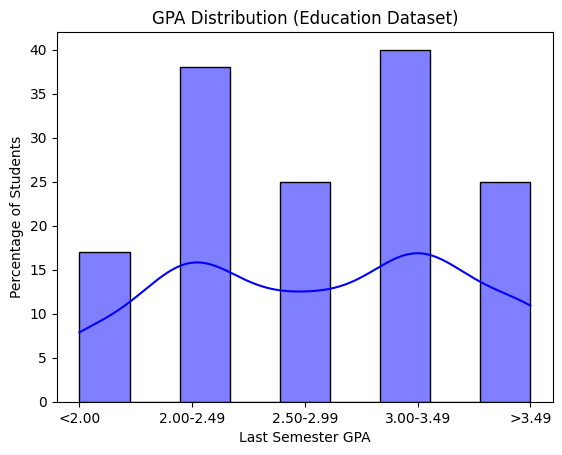

In [30]:
sns.histplot(data['Last Semester GPA (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: >3.49)'], kde=True, color='blue')
plt.title("GPA Distribution (Education Dataset)")
plt.xlabel("Last Semester GPA")
plt.ylabel("Percentage of Students")
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=["<2.00", "2.00-2.49", "2.50-2.99", "3.00-3.49", ">3.49"])
plt.show()